In [1]:
import albumentations as A
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import normalize
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from imutils import paths
import zipfile # Библиотека для работы с zip архивами
import os      # Библиотека для работы с фаловой системой 
import time 
import pandas as pd
import numpy as np
import random
import pickle
import cv2 as cv
import os

### Аугментируем данные

In [ ]:
# transform = A.Compose([
#             A.RandomBrightnessContrast(p=0.2),
#             A.GaussNoise(p=0.5, var_limit=(0.0, 114.0)),
#             A.ChannelShuffle(p=0.4),
#             A.GridDistortion(),
#             A.RandomScale(always_apply=False, p=0.9, scale_limit=(0.2, 2)),
#             ])

In [ ]:
# pics = os.listdir('bonuses')
# for i in range(len(pics)):
#     if pics[i] == '.DS_Store':
#         continue
#     image = cv.imread('bonuses/'+ pics[i])
#     image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
#     for j in range(7):
#         transformed = transform(image=image)
#         transformed_image = transformed["image"]
#         cv.imwrite(f'bonuses/{pics[i]}_{i}{j}.jpg', transformed_image)

## Обучение данных

In [ ]:
# import pathlib
# path = pathlib.Path("00")
# for i, path in enumerate(path.glob('*.jpg')):
#     new_name = '0_' + str(i) + '.jpg'
#     path.rename('0/' + new_name)

In [2]:
data = []
labels = []

In [3]:
def get_time_read(dir_read):
    cur_time = time.time()          # Засекаем текущее время
    num = 0                         # Количество прочитанных файлов
    list_dir = os.listdir(dir_read) # Получаем список подкаталогов                  
    for cur_dir in list_dir:
        if cur_dir == '.DS_Store':
            continue
        else:
            list_file = os.listdir(dir_read + '/' + cur_dir)
            try:
                for cur_file in list_file:
                    if cur_file == '.DS_Store':
                        continue
                    image = cv.imread(dir_read + '/' + cur_dir + '/' + cur_file)
                    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
                    image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
                    image = cv.resize(image, (100, 100))
                    data.append(image)
                    category = cur_file.split('_')[0]
                    if category == '100':
                        labels.append(1)
                    else:
                        labels.append(0)
                    num += 1
            except Exception as e:
                print(e)
    print('Количество загруженных изображений =', num)
    print('Затрачено времени -', round(time.time() - cur_time, 2), 'cек')

In [4]:
try:
    get_time_read('bonuses')
except:
    print('x')

Количество загруженных изображений = 2656
Затрачено времени - 3.84 cек


In [5]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

(trainX, testX, trainY, testY) = train_test_split(data,
    labels, test_size=0.20, random_state=30)

trainX = normalize(trainX, axis=1)
testX = normalize(testX, axis=1)

In [13]:
INIT_LR = 0.001
EPOCHS = 15
# INPUT_SHAPE = (100, 100, 3, )

In [22]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(100, 100, 1, )))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [23]:
model.compile(
              loss='binary_crossentropy',
              metrics=['accuracy'],
              optimizer=tf.keras.optimizers.Adam()
             )

In [24]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 10, 10, 64)      

In [26]:
# обучение
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=10, batch_size=64, verbose=1, shuffle=False)

Epoch 1/10
34/34 [==============================] - 11s 331ms/step - loss: 0.0047 - accuracy: 0.9981 - val_loss: 0.0050 - val_accuracy: 0.9962
Epoch 2/10
34/34 [==============================] - 12s 357ms/step - loss: 0.0039 - accuracy: 0.9986 - val_loss: 0.0060 - val_accuracy: 0.9981
Epoch 3/10
34/34 [==============================] - 11s 333ms/step - loss: 0.0043 - accuracy: 0.9991 - val_loss: 0.0531 - val_accuracy: 0.9831
Epoch 4/10
34/34 [==============================] - 12s 343ms/step - loss: 0.0090 - accuracy: 0.9976 - val_loss: 0.0032 - val_accuracy: 0.9981
Epoch 5/10
34/34 [==============================] - 11s 334ms/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 0.0025 - val_accuracy: 0.9981
Epoch 6/10
34/34 [==============================] - 12s 348ms/step - loss: 0.0053 - accuracy: 0.9991 - val_loss: 0.0063 - val_accuracy: 0.9981
Epoch 7/10
34/34 [==============================] - 11s 330ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0080 - val_accuracy: 0.9962

In [27]:
model.save('bonuses_model.h5')

In [ ]:
# # оценка нейросети
# predictions = model.predict(testX, batch_size=32)
# print(classification_report(testY.argmax(axis=1),
#                             predictions.argmax(axis=1), target_names=lb.classes_))

1/1 [==============================] - 0s 15ms/step
The prediction is  [[0.99999994]]
The actual label is  1


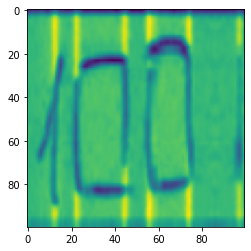

In [35]:
n=400
img=testX[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0)
print("The prediction is ", model.predict(input_img))
print("The actual label is ", testY[n])

In [37]:
_, acc = model.evaluate(testX, testY)
print("Accuracy = ", (acc * 100), "%")

17/17 [==============================] - 1s 40ms/step - loss: 0.0096 - accuracy: 0.9962
Accuracy =  99.62406158447266 %
